<a href="https://colab.research.google.com/github/sreyaschaithanya/football_analysis/blob/main/Football_2_Tracking_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/Football/tracking-data/data/"
MATCHES_PATH = DATA_PATH+"matches/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import json
import pprint
import math
import matplotlib.animation as animation

In [ ]:
rawEvents = pd.read_csv(DATA_PATH+"Sample_Game_2/Sample_Game_2_RawEventsData.csv")
rawHome = pd.read_csv(DATA_PATH+"Sample_Game_2/Sample_Game_2_RawTrackingData_Away_Team.csv")
rawAway = pd.read_csv(DATA_PATH+"Sample_Game_2/Sample_Game_2_RawTrackingData_Home_Team.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 25 17:32:00 2020

@author: davsu428
"""
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def createPitch(length,width, unity,linecolor): # in meters
    # Code by @JPJ_dejong

    """
    creates a plot in which the 'length' is the length of the pitch (goal to goal).
    And 'width' is the width of the pitch (sideline to sideline). 
    Fill in the unity in meters or in yards.

    """
    #Set unity
    if unity == "meters":
        # Set boundaries
        if length >= 120.5 or width >= 75.5:
            return(str("Field dimensions are too big for meters as unity, didn't you mean yards as unity?\
                       Otherwise the maximum length is 120 meters and the maximum width is 75 meters. Please try again"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)
           
            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)
            
            #Left Penalty Area
            plt.plot([16.5 ,16.5],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([0,16.5],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([16.5,0],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)
            
            #Right Penalty Area
            plt.plot([(length-16.5),length],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([(length-16.5), (length-16.5)],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([(length-16.5),length],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)
            
            #Left 5-meters Box
            plt.plot([0,5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([5.5,5.5],[(width/2+7.32/2+5.5),(width/2-7.32/2-5.5)],color=linecolor)
            plt.plot([5.5,0.5],[(width/2-7.32/2-5.5),(width/2-7.32/2-5.5)],color=linecolor)
            
            #Right 5 -eters Box
            plt.plot([length,length-5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([length-5.5,length-5.5],[(width/2+7.32/2+5.5),width/2-7.32/2-5.5],color=linecolor)
            plt.plot([length-5.5,length],[width/2-7.32/2-5.5,width/2-7.32/2-5.5],color=linecolor)
            
            #Prepare Circles
            centreCircle = plt.Circle((length/2,width/2),9.15,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((11,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-11,width/2),0.8,color=linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11,width/2),height=18.3,width=18.3,angle=0,theta1=308,theta2=52,color=linecolor)
            rightArc = Arc((length-11,width/2),height=18.3,width=18.3,angle=0,theta1=128,theta2=232,color=linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
            #Axis titles

    #check unity again
    elif unity == "yards":
        #check boundaries again
        if length <= 95:
            return(str("Didn't you mean meters as unity?"))
        elif length >= 131 or width >= 101:
            return(str("Field dimensions are too big. Maximum length is 130, maximum width is 100"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)
           
            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)
            
            #Left Penalty Area
            plt.plot([18 ,18],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([0,18],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([18,0],[(width/2 -18),(width/2 -18)],color=linecolor)
            
            #Right Penalty Area
            plt.plot([(length-18),length],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([(length-18), (length-18)],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([(length-18),length],[(width/2 -18),(width/2 -18)],color=linecolor)
            
            #Left 6-yard Box
            plt.plot([0,6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([6,6],[(width/2+7.32/2+6),(width/2-7.32/2-6)],color=linecolor)
            plt.plot([6,0],[(width/2-7.32/2-6),(width/2-7.32/2-6)],color=linecolor)
            
            #Right 6-yard Box
            plt.plot([length,length-6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([length-6,length-6],[(width/2+7.32/2+6),width/2-7.32/2-6],color=linecolor)
            plt.plot([length-6,length],[(width/2-7.32/2-6),width/2-7.32/2-6],color=linecolor)
            
            #Prepare Circles; 10 yards distance. penalty on 12 yards
            centreCircle = plt.Circle((length/2,width/2),10,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((12,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-12,width/2),0.8,color=linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11,width/2),height=20,width=20,angle=0,theta1=312,theta2=48,color=linecolor)
            rightArc = Arc((length-11,width/2),height=20,width=20,angle=0,theta1=130,theta2=230,color=linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
                
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax


def createPitchOld():
    #Taken from FC Python        
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color=linecolor)
    plt.plot([0,130],[90,90], color=linecolor)
    plt.plot([130,130],[90,0], color=linecolor)
    plt.plot([130,0],[0,0], color=linecolor)
    plt.plot([65,65],[0,90], color=linecolor)
    
    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color=linecolor)
    plt.plot([0,16.5],[65,65],color=linecolor)
    plt.plot([16.5,0],[25,25],color=linecolor)
    
    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color=linecolor)
    plt.plot([113.5,113.5],[65,25],color=linecolor)
    plt.plot([113.5,130],[25,25],color=linecolor)
    
    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color=linecolor)
    plt.plot([5.5,5.5],[54,36],color=linecolor)
    plt.plot([5.5,0.5],[36,36],color=linecolor)
    
    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color=linecolor)
    plt.plot([124.5,124.5],[54,36],color=linecolor)
    plt.plot([124.5,130],[36,36],color=linecolor)
    
    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color=linecolor,fill=False)
    centreSpot = plt.Circle((65,45),0.8,color=linecolor)
    leftPenSpot = plt.Circle((11,45),0.8,color=linecolor)
    rightPenSpot = plt.Circle((119,45),0.8,color=linecolor)
    
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color=linecolor)
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color=linecolor)

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax

def createGoalMouth():
    #Adopted from FC Python
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    linecolor='black'

    #Pitch Outline & Centre Line
    plt.plot([0,65],[0,0], color=linecolor)
    plt.plot([65,65],[50,0], color=linecolor)
    plt.plot([0,0],[50,0], color=linecolor)
    
    #Left Penalty Area
    plt.plot([12.5,52.5],[16.5,16.5],color=linecolor)
    plt.plot([52.5,52.5],[16.5,0],color=linecolor)
    plt.plot([12.5,12.5],[0,16.5],color=linecolor)
    
    #Left 6-yard Box
    plt.plot([41.5,41.5],[5.5,0],color=linecolor)
    plt.plot([23.5,41.5],[5.5,5.5],color=linecolor)
    plt.plot([23.5,23.5],[0,5.5],color=linecolor)
    
    #Goal
    plt.plot([41.5-5.34,41.5-5.34],[-2,0],color=linecolor)
    plt.plot([23.5+5.34,41.5-5.34],[-2,-2],color=linecolor)
    plt.plot([23.5+5.34,23.5+5.34],[0,-2],color=linecolor)
    
    #Prepare Circles
    leftPenSpot = plt.Circle((65/2,11),0.8,color=linecolor)
    
    #Draw Circles
    ax.add_patch(leftPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((32.5,11),height=18.3,width=18.3,angle=0,theta1=38,theta2=142,color=linecolor)
    
    #Draw Arcs
    ax.add_patch(leftArc)
    
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax


In [ ]:
rawEvents.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58


In [ ]:
# lets get the type and subtype dict
typeDict = {}
for i in rawEvents["Type"].unique():
    typeDict[i] = []
typeDict

{'BALL LOST': [],
 'BALL OUT': [],
 'CARD': [],
 'CHALLENGE': [],
 'FAULT RECEIVED': [],
 'PASS': [],
 'RECOVERY': [],
 'SET PIECE': [],
 'SHOT': []}

In [ ]:
for i,p in rawEvents.iterrows():
    if (p["Subtype"] not in typeDict[p["Type"]]) and type(p["Subtype"]) != float:
        #print(p["Subtype"])
        typeDict[p["Type"]].append(p["Subtype"])

In [ ]:
pprint.pprint(typeDict)

{'BALL LOST': ['INTERCEPTION',
               'HEAD-INTERCEPTION',
               'HEAD',
               'THEFT',
               'GOAL KICK-INTERCEPTION',
               'OFFSIDE',
               'CLEARANCE',
               'CROSS-INTERCEPTION',
               'FORCED',
               'FORCED-END HALF',
               'HAND BALL',
               'CLEARANCE-INTERCEPTION'],
 'BALL OUT': ['HEAD', 'CLEARANCE', 'HEAD-CLEARANCE', 'CROSS'],
 'CARD': ['YELLOW'],
 'CHALLENGE': ['GROUND-LOST',
               'GROUND-WON',
               'AERIAL-WON',
               'AERIAL-LOST',
               'TACKLE-LOST',
               'AERIAL-FAULT-WON',
               'AERIAL-FAULT-LOST',
               'TACKLE-WON',
               'GROUND-FAULT-LOST',
               'GROUND-FAULT-WON',
               'GROUND-ADVANTAGE-LOST',
               'GROUND-ADVANTAGE-WON',
               'TACKLE-FAULT-LOST',
               'TACKLE-FAULT-WON',
               'TACKLE-ADVANTAGE-WON',
               'GROUND',
        

# Laurie on tracking

In [ ]:
import sys
sys.path.insert(1, '/content/drive/My Drive/Football/LaurieOnTracking')

from Metrica_IO import *
game_id = 2
teamname = "Away"

trackingAway = tracking_data(DATA_PATH,game_id,teamname)

Reading team: away


In [ ]:
trackingAway.head()

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,Away_18_x,Away_18_y,Away_19_x,Away_19_y,Away_20_x,Away_20_y,Away_21_x,Away_21_y,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,0.38954,0.36505,0.31049,0.49564,0.91364,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
2,1,0.08,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,0.38954,0.36505,0.31049,0.49564,0.91364,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
3,1,0.12,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,0.38954,0.36505,0.31049,0.49564,0.91364,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
4,1,0.16,0.01218,0.51763,0.32836,0.81847,0.30734,0.55182,0.32235,0.38954,0.36505,0.31049,0.49564,0.91364,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
5,1,0.20,0.01218,0.51763,0.32783,0.81847,0.30734,0.55182,0.32235,0.38954,0.36505,0.31049,0.49564,0.91364,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN


In [ ]:
f = open(DATA_PATH+"Sample_Game_2/Sample_Game_2_RawTrackingData_Away_Team.csv", "r")
for i in range(5):
    print(f.readline())

,,,Away,,Away,,Away,,Away,,Away,,Away,,Away,,Away,,Away,,Away,,Away,,Away,,,

,,,25,,15,,16,,17,,18,,19,,20,,21,,22,,23,,24,,26,,,

Period,Frame,Time [s],Player25,,Player15,,Player16,,Player17,,Player18,,Player19,,Player20,,Player21,,Player22,,Player23,,Player24,,Player 26,,Ball,

1,1,0.04,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,0.38954,0.36505,0.31049,0.49564,0.91364,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN

1,2,0.08,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,0.38954,0.36505,0.31049,0.49564,0.91364,0.39812,0.47218,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN



In [ ]:
# from here
df = pd.read_csv(DATA_PATH+"Sample_Game_2/Sample_Game_2_RawTrackingData_Away_Team.csv",skiprows=2)
new_name = []
names = df.columns
for i,v in enumerate(names):
    if "Unnamed" in v:
        new_name.append(names[i-1]+"_y")
    elif "Player" in v:
        new_name.append(v+"_x")
    elif "Ball" in v:
        new_name.append(v+"_x")
        new_name.append(v+"_y")
        break
    else:
        new_name.append(v)
df = pd.read_csv(DATA_PATH+"Sample_Game_2/Sample_Game_2_RawTrackingData_Away_Team.csv",skiprows=3,names=new_name)

In [ ]:
# transform in 1st quaderant
pitchLenX = 120
pitchWidY = 80

def transform_co(n,x):
    if n[-2:]=="_x":
        return pitchLenX*x
    elif n[-2:]=="_y":
        return pitchWidY*x
    else:
        return x
df = df.apply(lambda x: transform_co(x.name,x))
df.shape

(141156, 29)

In [ ]:
#instant = df.to_dict(orient='records')
instant = df.iloc[1000]
#print(instant)
col_x = [i for i in new_name if i[-2:]=="_x"]
col_y = [i for i in new_name if i[-2:]=="_y"]

players = tuple(zip(col_x,col_y))

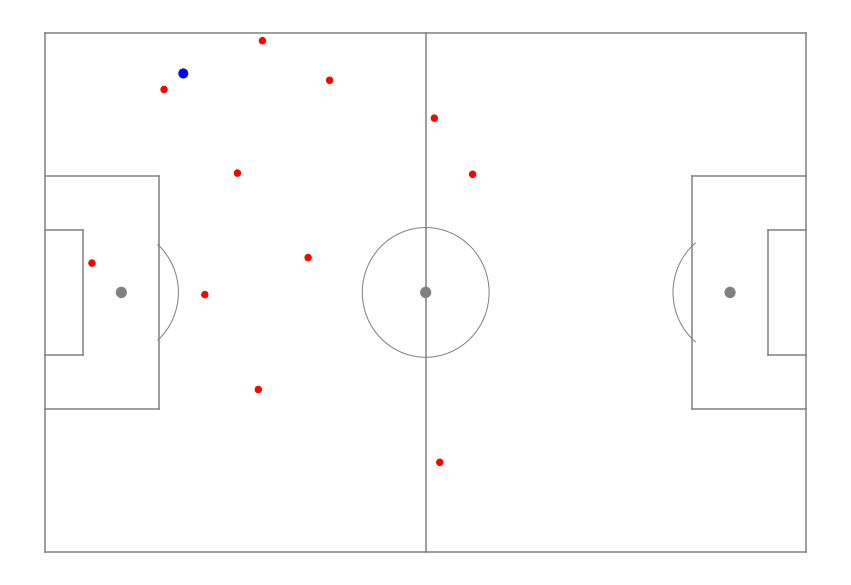

In [ ]:
(fig,ax) = createPitch(pitchLenX,pitchWidY,"yards","grey")
for i in players:
    #print(instant[i[0]])
    if "Ball" in i[0]:
        shotCircle = plt.Circle((instant[i[0]],instant[i[1]]),0.7,color="blue")
    else:
        shotCircle = plt.Circle((instant[i[0]],instant[i[1]]),0.5,color="red")
    ax.add_patch(shotCircle)
fig.set_size_inches(15, 10.5)

# animation

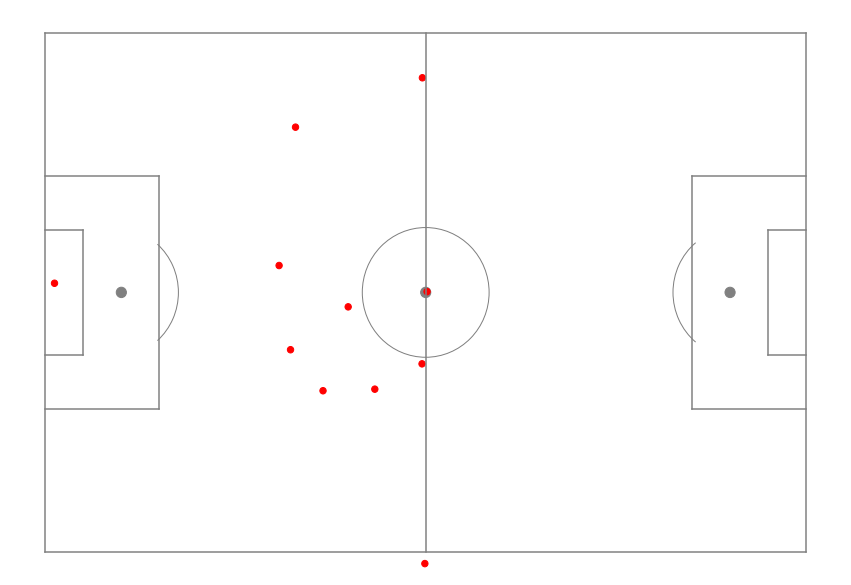

In [ ]:
(fig,ax) = createPitch(pitchLenX,pitchWidY,"yards","grey")
fig.set_size_inches(15, 10.5)
instant = df.iloc[1]
tup = []
for i in players:
    #print(instant[i[0]])
    if "Ball" in i[0]:
        shotCircle = plt.Circle((instant[i[0]],instant[i[1]]),0.7,color="blue")
    else:
        shotCircle = plt.Circle((instant[i[0]],instant[i[1]]),0.5,color="red")
    #ax.add_patch(shotCircle)
    tup.append(shotCircle)

def init():
    instant = df.iloc[1]
    for pos,i in enumerate(players):
        #print(instant[i[0]])
        if "Ball" in i[0]:
            tup[pos].center = (instant[i[0]], instant[i[1]])
            tup[pos].color = "blue"
            #shotCircle = plt.Circle((instant[i[0]],instant[i[1]]),0.7,color="blue")
        else:
            tup[pos].center = (instant[i[0]], instant[i[1]])
            tup[pos].color = "red"
            #shotCircle = plt.Circle((instant[i[0]],instant[i[1]]),0.5,color="red")
        ax.add_patch(tup[pos])
    #print(tup)
    return tup

def update_frame(i):
    instant = df.iloc[i]
    #print(instant)
    #print(i)
    for pos,i in enumerate(players):
        if "Ball" in i[0]:
            tup[pos].center = (instant[i[0]], instant[i[1]])
            tup[pos].color = "blue"
            #shotCircle = plt.Circle((instant[i[0]],instant[i[1]]),0.7,color="blue")
        else:
            tup[pos].center = (instant[i[0]], instant[i[1]])
            tup[pos].color = "red"
            #shotCircle = plt.Circle((instant[i[0]],instant[i[1]]),0.5,color="red")
        #ax.add_patch(shotCircle)
    #print(tup)
    return tup

anim = animation.FuncAnimation(fig, update_frame,init_func=init,
                               frames=500,
                               interval=20,
                               repeat=True)
plt.show()

In [ ]:
anim.save('animation.mp4', fps=30, 
          extra_args=['-vcodec', 'h264', 
                      '-pix_fmt', 'yuv420p'])